1) Загрузить данные и провести предварительную проверку, включая число наблюдений, количество столбцов, типы данных и наличие пропущенных значений. Исследовать уникальные значения в данных.

2) Анализ показов (Impressions): Построить график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

3) CTR (Click-Through Rate) анализ: Создать новую колонку с CTR. Посмотреть на описательные статистики и распределение CTR.

4) Визуализировать CTR с разбивкой по номеру рекламной кампании.

5) Анализ стоимости за клик пользователя (CPC): Посчитать стоимость за клик пользователя по объявлению (CPC).

6) Визуализировать CPC с разбивкой по полу пользователей, которым были показаны объявления.

7) Конверсия из клика в покупку: Посчитать конверсию из клика в покупку.

Описание Данных:

ad_id: идентификатор объявления (рекламы);
xyz_campaign_id: идентификатор рекламной кампании в базе компании X;
fb_campaign_id: идентификатор кампании в Facebook;
age: возрастная группа, которой показывалась реклама;
gender: пол тех, кому показывалась реклама;
interest: код, указывающий категорию интереса пользователя;
impressions: число показов;
clicks: число кликов;
spent: сумма, которую компания потратила на показ объявления;
total_conversion: количество людей, заинтересовавшихся продуктом после просмотра рекламы;
approved_conversion: количество людей, купивших продукт после просмотра рекламы;


1) Загрузить данные и провести предварительную проверку, включая число наблюдений, количество столбцов, типы данных и наличие пропущенных значений. Исследовать уникальные значения в данных.

In [13]:
import pandas as pd

df = pd.read_csv('conversion.csv')

print(df.dtypes)
print('--------------')
print(df.xyz_campaign_id.describe())
print('--------------')
print(df.isna().sum())
print('--------------')
print(df.xyz_campaign_id.nunique())

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object
--------------
count    1143.000000
mean     1067.382327
std       121.629393
min       916.000000
25%       936.000000
50%      1178.000000
75%      1178.000000
max      1178.000000
Name: xyz_campaign_id, dtype: float64
--------------
ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64
--------------
3


2) Анализ показов (Impressions): Построить график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


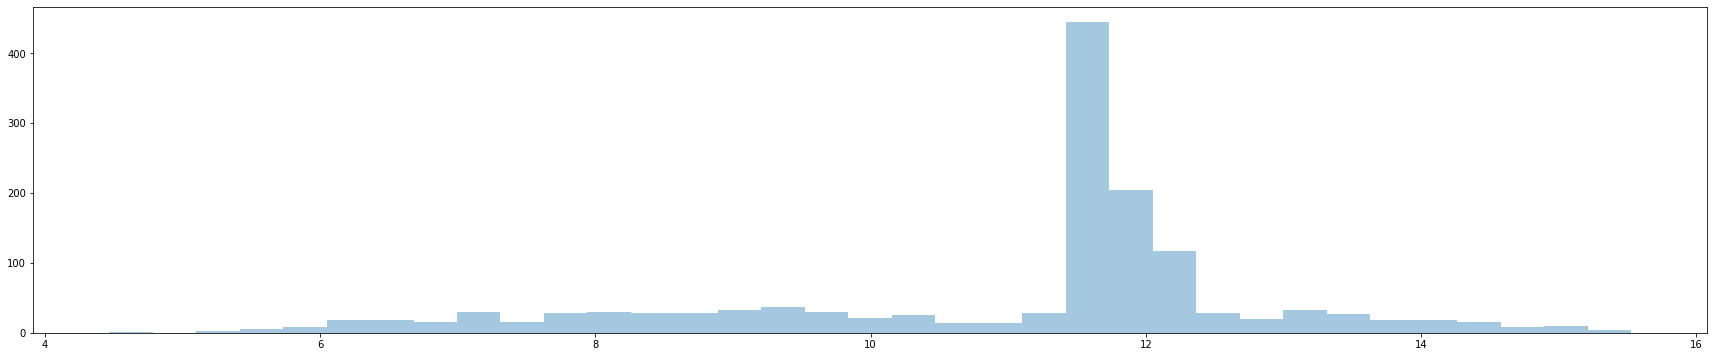

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('conversion.csv')

impressions = df.groupby('fb_campaign_id')\
                    .agg({'Impressions':'sum'}).reset_index()

log_impressions = np.log(impressions)
log_impressions
plt.figure(figsize=(30, 6))
sns.distplot(log_impressions,kde = False)

3) CTR (Click-Through Rate) анализ: Создать новую колонку с CTR. Посмотреть на описательные статистики и распределение CTR. 

In [35]:
import pandas as pd

df = pd.read_csv('conversion.csv')

df['CTR'] = df.Clicks/df.Impressions
ctr_max = df.CTR.idxmax()
line_ctr_max = df.iloc[ctr_max]
line_ctr_max

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

4) Визуализировать CTR с разбивкой по номеру рекламной кампании.

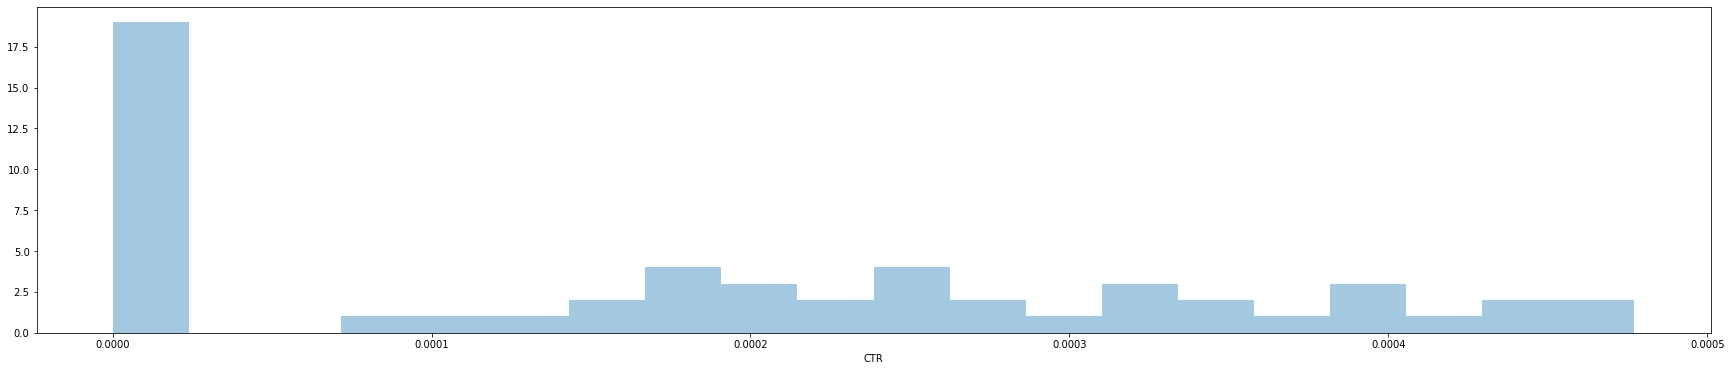

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('conversion.csv')

df['CTR'] = df.Clicks/df.Impressions

first_cam = df.query('xyz_campaign_id == "916"')

plt.figure(figsize=(30, 6))
sns.distplot(first_cam.CTR, kde = False, bins = 20)

5) Анализ стоимости за клик пользователя (CPC): Посчитать стоимость за клик пользователя по объявлению (CPC).

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
CTR                    float64
CPC                    float64
dtype: object
--------------
count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64
--------------
--------------


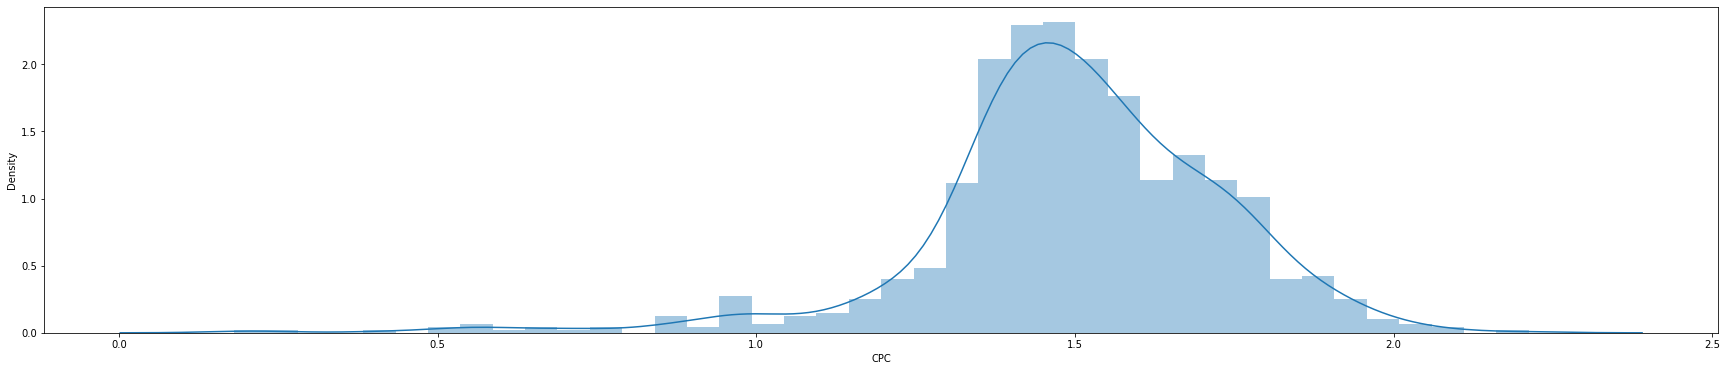

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

df = pd.read_csv('conversion.csv')

df['CTR'] = df.Clicks/df.Impressions
df['CPC'] = df.Spent/df.Clicks

print(df.dtypes)
print('--------------')
print(df.CPC.describe())
print('--------------')
scipy.stats.iqr(df.CPC, nan_policy='omit')
print('--------------')


plt.figure(figsize=(30, 6))
sns.distplot(df.CPC)

6) Визуализировать CPC с разбивкой по полу пользователей, которым были показаны объявления.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


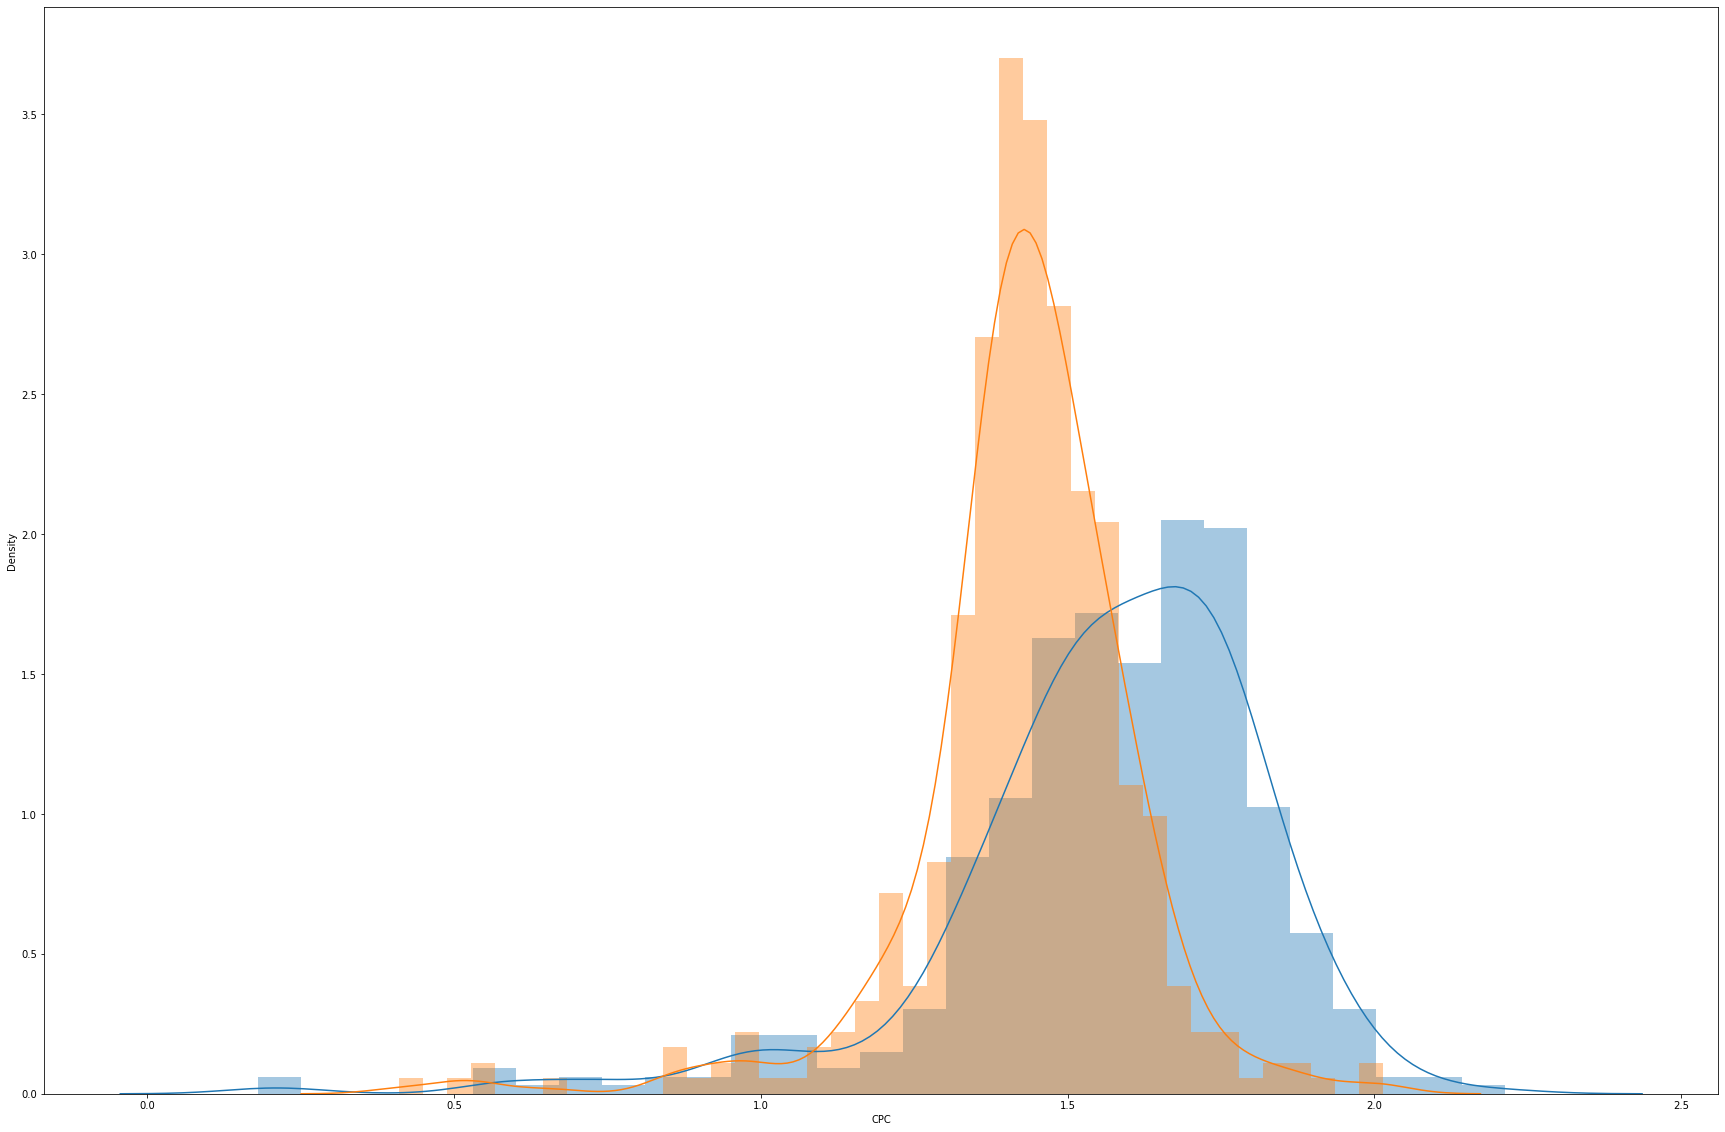

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

df = pd.read_csv('conversion.csv')

df['CTR'] = df.Clicks/df.Impressions
df['CPC'] = df.Spent/df.Clicks

m = df.query('gender == "M"')
f = df.query('gender == "F"')

plt.figure(figsize=(30, 20))
sns.distplot(m.CPC)
sns.distplot(f.CPC)

7) Конверсия из клика в покупку: Посчитать конверсию из клика в покупку.

In [62]:
import pandas as pd

df = pd.read_csv('conversion.csv')

ad_id_1121814 = df.query('ad_id == "1121814"')

conversion_rate = ad_id_1121814.Approved_Conversion/ad_id_1121814.Clicks
conversion_rate


860    0.030879
dtype: float64